<a href="https://colab.research.google.com/github/oogong/clustering/blob/main/%EC%A3%BC%EC%8B%9D%EC%A2%85%EB%AA%A9_%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
!pip install sklearn
!pip install pandas

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [12]:
!pip install matpoltlib

ERROR: Could not find a version that satisfies the requirement matpoltlib (from versions: none)
ERROR: No matching distribution found for matpoltlib


In [47]:
import pandas as pd
from sklearn import datasets

In [48]:
# 예시로 사용할 iris 데이터 -> 추후 주식 데이터로 변경
iris = datasets.load_iris()
columns=['sepal_length','sepal_width','petal_length','petal_width']
df_iris=pd.DataFrame(iris.data,columns=columns)
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
from matplotlib import pyplot as plt

In [50]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df_iris[df_iris['target']==i]['sepal_length']
    y_axis_data=df_iris[df_iris['target']==i]['sepal_width']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

KeyError: 'target'

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [52]:
# scale 맞추기
scaler=StandardScaler()
iris_scaled=scaler.fit_transform(df_iris.iloc[:,:-1])

In [53]:
#2차원으로 차원 축소
pca=PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca=pca.transform(iris_scaled)
pca_columns=['column1','column2']
df_iris_pca=pd.DataFrame(iris_pca,columns=pca_columns)
df_iris_pca.head()

,column1,column2
0,-1.857165,0.424131
1,-1.593939,-0.714558
2,-1.951778,-0.410390
3,-1.866616,-0.661099
4,-2.016522,0.578350


In [54]:
markers=['^','s','o']

for i, marker in enumerate(markers):
    x_axis_data=df_iris_pca[df_iris_pca['target']==i]['column1']
    y_axis_data=df_iris_pca[df_iris_pca['target']==i]['column2']
    plt.scatter(x_axis_data,y_axis_data,marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('column1')
plt.ylabel('column2')
plt.show()

KeyError: 'target'

In [55]:
from sklearn.cluster import KMeans

In [56]:
# 학습
kmeans = KMeans(n_clusters=5, random_state=7)

kmeans.fit(df_iris_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=7)

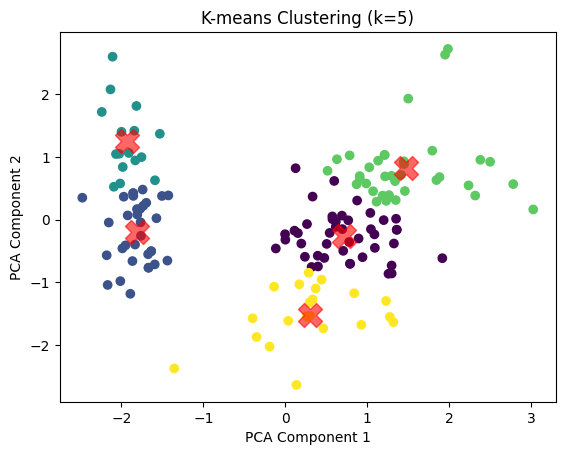

In [57]:
# 클러스터링 결과 라벨
labels = kmeans.labels_

# 클러스터 센터
centers = kmeans.cluster_centers_

# 시각화
plt.scatter(df_iris_pca['column1'], df_iris_pca['column2'], c=labels, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=300, alpha=0.6, marker='X')  # 클러스터 센터
plt.title('K-means Clustering (k=5)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


In [58]:
df_iris_pca['cluster_id'] = kmeans.labels_
df_iris_pca

,column1,column2,cluster_id
0,-1.857165,0.424131,1
1,-1.593939,-0.714558,1
2,-1.951778,-0.410390,1
3,-1.866616,-0.661099,1
4,-2.016522,0.578350,2
...,...,...,...
145,1.264821,0.392894,3
146,1.297352,-0.859360,0
147,1.112376,0.287866,3
148,0.629421,0.965790,3
